In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def map_to_conference(team):
    conferences = {
        'ATL': 'Eastern',
        'BOS': 'Eastern',
        'BKN': 'Eastern',
        'CHA': 'Eastern',
        'CHI': 'Eastern',
        'CLE': 'Eastern',
        'DAL': 'Western',
        'DEN': 'Western',
        'DET': 'Eastern',
        'GSW': 'Western',
        'HOU': 'Western',
        'IND': 'Eastern',
        'LAC': 'Western',
        'LAL': 'Western',
        'MEM': 'Western',
        'MIA': 'Eastern',
        'MIL': 'Eastern',
        'MIN': 'Western',
        'NOP': 'Western',
        'NYK': 'Eastern',
        'OKC': 'Western',
        'ORL': 'Eastern',
        'PHI': 'Eastern',
        'PHX': 'Western',
        'POR': 'Western',
        'SAC': 'Western',
        'SAS': 'Western',
        'TOR': 'Eastern',
        'UTA': 'Western',
        'WAS': 'Eastern',
    }

    return conferences.get(team, 'Unknown')

In [3]:
current_directory = os.getcwd()
detailed_players = 'nba2021_per_game.csv'
detailed_advanced = 'nba2021_advanced.csv'
motion_detail = 'player_metrics_open.csv'
motion_path = 'path_detail_open.csv'


playersDet = 'PlayerDetails'
open_motion = 'Open'

In [4]:
file_path_det = os.path.join(current_directory,playersDet,detailed_players)
file_path_motion = os.path.join(current_directory,open_motion,motion_detail)
file_path_advanced = os.path.join(current_directory,playersDet,detailed_advanced)

df_detailed = pd.read_csv(file_path_det)
df_motion = pd.read_csv(file_path_motion)
df_advanced = pd.read_csv(file_path_advanced)

In [6]:
df_motion['FullName'] = df_motion['fnm'] + ' ' + df_motion['lnm']
df_motion = df_motion.drop(columns=['fnm', 'lnm'], axis=1)

merged_df1 = pd.merge(df_detailed, df_advanced, right_on='Player', left_on='Player', how='inner', suffixes=('', '_df2'))
merged_df = pd.merge(merged_df1, df_motion, right_on='FullName', left_on='Player', how='inner')
merged_df['Team'] = merged_df['Tm']
merged_df['Conference'] = merged_df['Team'].apply(map_to_conference)

column_order = ['Player', 'Pos', 'Team', 'Age','hght','n','G','MP','USG%','FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'TS%','bx', 'by', 'bz', 'rt', 'rx', 'ry', 'rz', 'rv', 'rvx', 'rvy', 'rvz', 'mnv', 'mnvt', 'mnvx', 'mnvy', 'mnvz', 'mxv', 'mxvt', 'mxvx', 'mxvy', 'mxvz', 'ta1t', 'ta1x', 'ta1y', 'ta1z', 'ta2t', 'ta2x', 'ta2y', 'ta2z', 'at1t', 'at1x', 'at1y', 'at1z', 'at2t', 'at2x', 'at2y', 'at2z', 'lr1t', 'lr1x', 'lr1y', 'lr1z', 'lr2t', 'lr2x', 'lr2y', 'lr2z', 'rl1t', 'rl1x', 'rl1y', 'rl1z', 'rl2t', 'rl2x', 'rl2y', 'rl2z', 'pl', 'spl', 'plr']  

#### Executable for data analysis

In [19]:
column_name = 'ta2t'

# Count the number of null values in the specified column
null_count = merged_df[column_name].isnull().sum()
total_count = merged_df[column_name].count()

# Print the result
print(f"The column '{column_name}' has {null_count} null values.")
print(f"The column '{column_name}' has a total of {total_count} values.")

The column 'ta2t' has 101 null values.
The column 'ta2t' has a total of 0 values.


In [16]:
unique_values = merged_df['Pos'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_values)

Unique values in the column:
['PF' 'PG' 'SF' 'SG' 'C' 'G']


#### Additional changes for data

In [8]:

final_df = merged_df[column_order]
final_df = final_df[final_df['Pos'] != 'G']

### Heatmap

In [9]:
heatmap = final_df.loc[final_df.Pos.isin(['PG','SG', 'SF', 'PF', 'C']), ['Pos','FT%','2P%','3P%','FG%','TS%']].groupby('Pos').mean()
print(heatmap)

          FT%       2P%       3P%       FG%       TS%
Pos                                                  
C    0.677333  0.402000  0.383000  0.456000  0.595333
PF   0.705579  0.450368  0.414895  0.490474  0.614737
PG   0.841231  0.475654  0.367769  0.435962  0.552462
SF   0.795615  0.525154  0.386538  0.461769  0.590846
SG   0.783703  0.500811  0.366622  0.439000  0.573216


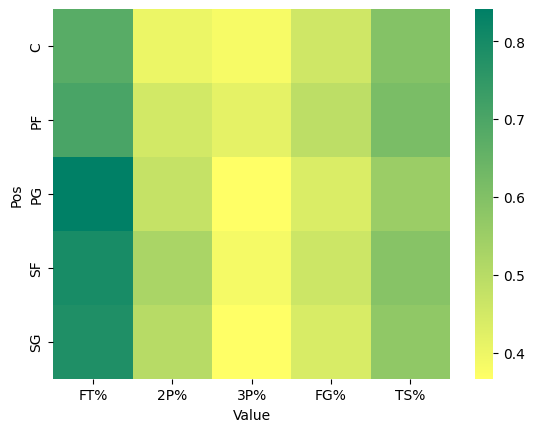

In [10]:
sns.heatmap(heatmap, cmap='summer_r')
plt.xlabel('Value')
plt.ylabel('Pos')
plt.show()

### Histogram of FGA

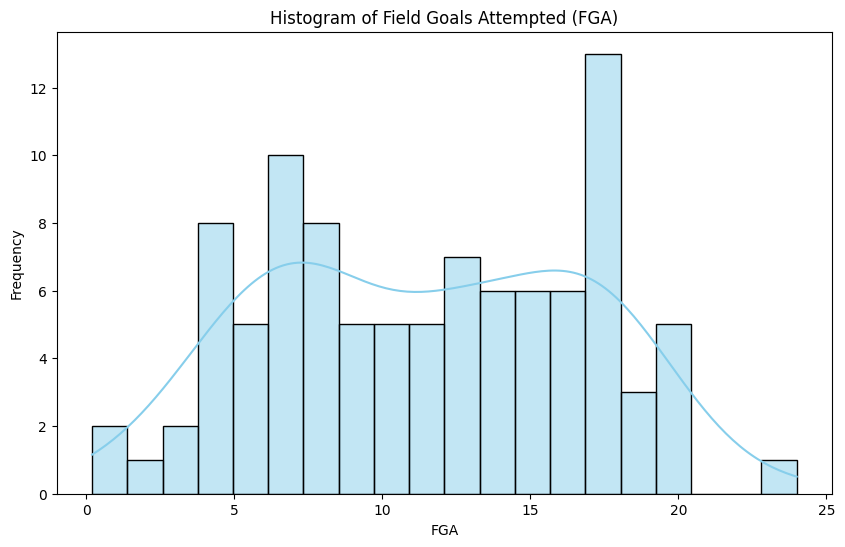

In [11]:
fga_data = final_df['FGA']
plt.figure(figsize=(10, 6))
sns.histplot(fga_data, bins=20, kde=True, color='skyblue')
plt.title('Histogram of Field Goals Attempted (FGA)')
plt.xlabel('FGA')
plt.ylabel('Frequency')
plt.show()

-Two different 'categories' should be investigated since there is zero to non similarity to normal distribution in combination to all data
-Would be smart to find a feature that splits into these two groups and makes two separate normal distribution groups/clusters

### Histogram of release time

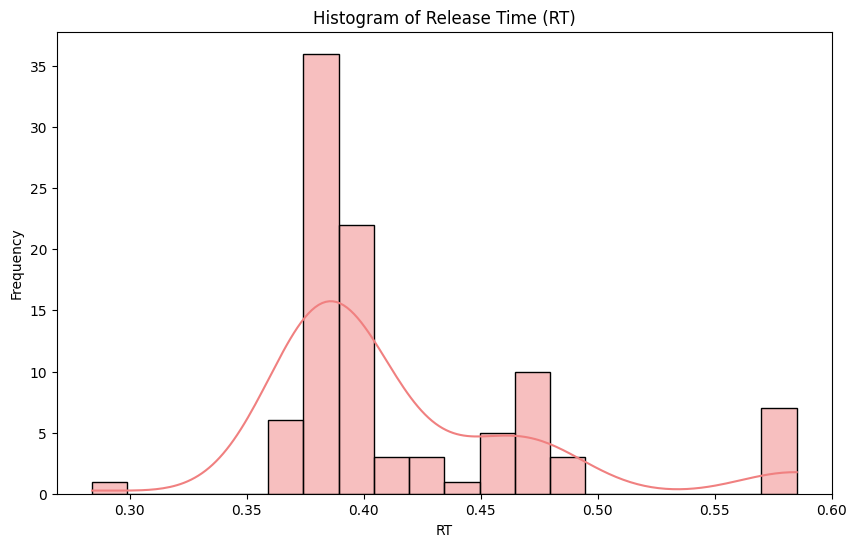

In [13]:
rt_data = final_df['rt']

plt.figure(figsize=(10, 6))
sns.histplot(rt_data, bins=20, kde=True, color='lightcoral')
plt.title('Histogram of Release Time (RT)')
plt.xlabel('RT')
plt.ylabel('Frequency')
plt.show()
